In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns = ['label','data']

In [10]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['binary'] = df['label'].map({'ham':0,'spam':1})

In [13]:
Y = df['binary'].values

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size = 0.33)

In [18]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [19]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'do': 24,
 'not': 25,
 'or': 26,
 'can': 27,
 'but': 28,
 'at': 29,
 'get': 30,
 'just': 31,
 'be': 32,
 "i'm": 33,
 'if': 34,
 'no': 35,
 'with': 36,
 'ur': 37,
 'will': 38,
 'this': 39,
 'we': 40,
 'gt': 41,
 'lt': 42,
 '4': 43,
 'free': 44,
 'when': 45,
 'ok': 46,
 'up': 47,
 'from': 48,
 'go': 49,
 'how': 50,
 'what': 51,
 'all': 52,
 'know': 53,
 'out': 54,
 'like': 55,
 'got': 56,
 'am': 57,
 'then': 58,
 'good': 59,
 'only': 60,
 'come': 61,
 'time': 62,
 'was': 63,
 'its': 64,
 'day': 65,
 'there': 66,
 'want': 67,
 'send': 68,
 'he': 69,
 'love': 70,
 'text': 71,
 'by': 72,
 'as': 73,
 'sorry': 74,
 'one': 75,
 'txt': 76,
 'going': 77,
 'still': 78,
 'home': 79,
 'see': 80,
 'lor': 81,
 'need': 82,
 "i'll": 83,
 'about': 84,
 

In [20]:
V = len(tokenizer.word_index)

In [21]:
V

7161

In [22]:
data_train = pad_sequences(sequence_train)

In [23]:
data_train.shape

(3733, 189)

In [24]:
data_test = pad_sequences(sequence_test, maxlen = 189)

In [25]:
data_test.shape

(1839, 189)

In [27]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(189,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [29]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Y_train,
  epochs=5,
  validation_data=(data_test, Y_test)
)

Training model...
Train on 3733 samples, validate on 1839 samples
Epoch 1/5
3733/3733 [==============================] - 2s 462us/sample - loss: 0.3800 - accuracy: 0.8677 - val_loss: 0.2850 - val_accuracy: 0.8624
Epoch 2/5
3733/3733 [==============================] - 1s 275us/sample - loss: 0.1421 - accuracy: 0.9362 - val_loss: 0.0952 - val_accuracy: 0.9712
Epoch 3/5
3733/3733 [==============================] - 1s 265us/sample - loss: 0.0251 - accuracy: 0.9912 - val_loss: 0.0942 - val_accuracy: 0.9799
Epoch 4/5
3733/3733 [==============================] - 1s 264us/sample - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.1080 - val_accuracy: 0.9821
Epoch 5/5
3733/3733 [==============================] - 1s 268us/sample - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.1009 - val_accuracy: 0.9853


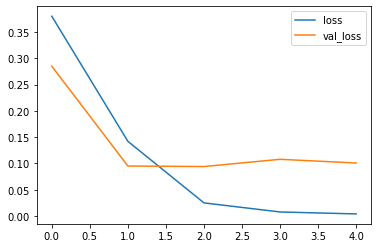

In [30]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

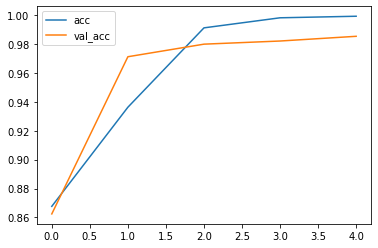

In [31]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()